In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
#dhyan se dekho aur samjho
sum(data.isnull().sum())

0

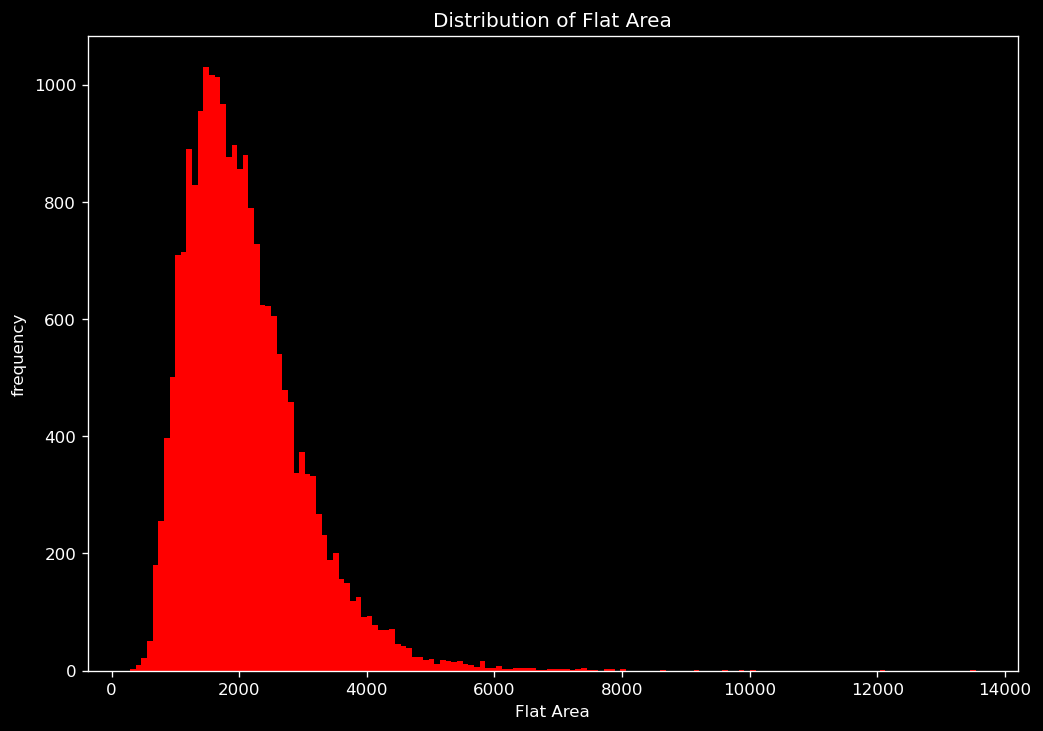

In [6]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [14]:
def logtransform(sampledata):
  return np.log(sampledata)

In [15]:
data['Transformed Flat Area'] = np.log(data['Flat Area (in Sqft)'])
#or
data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(logtransform)

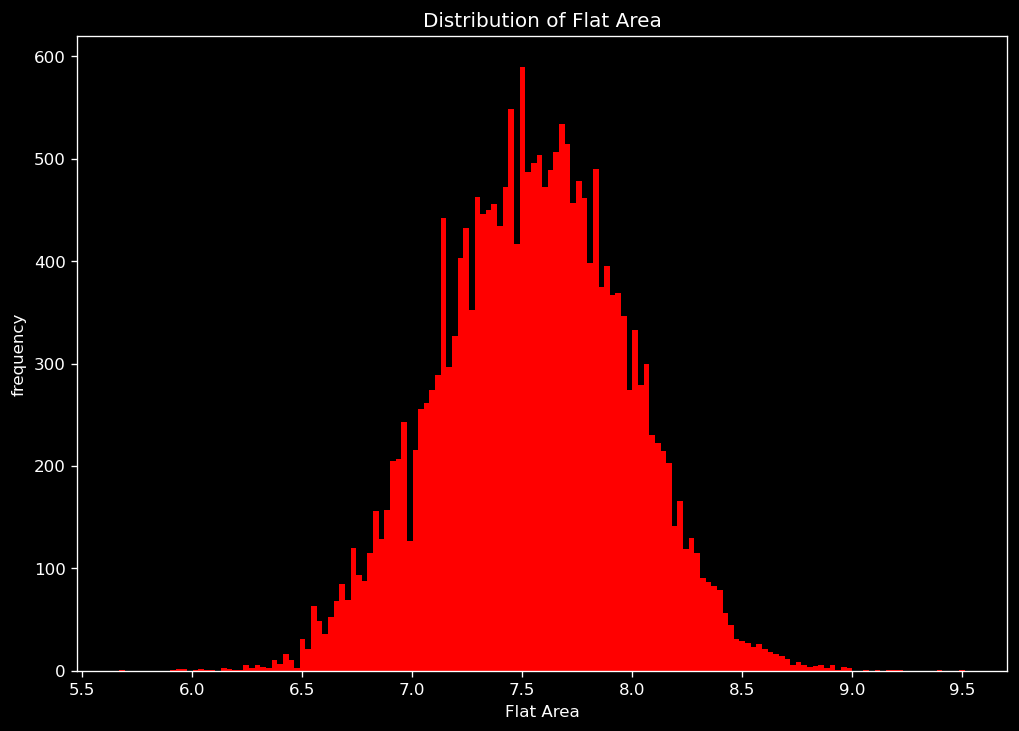

In [16]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

# Dummy Encoding

In [17]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [20]:
dummy_var1 = pd.get_dummies( data['Condition of the House'], drop_first = True, prefix = 'Condition is')
dummy_var1.head()

,Condition is_Excellent,Condition is_Fair,Condition is_Good,Condition is_Okay
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


label encoding >>>> dummy encoding

as creating dummys of vairables increases its dimensionality which affects optimum learning in a bad way.

# Label Encoding

In [21]:
#we put condition of the house ka data in label encoding
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [22]:
# we perform label encoding
label_encoded = label_encoded.map({ 'Bad':1,
                                    'Okay':2,
                                    'Fair':3,
                                    'Good':4,
                                    'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning

- Binning of catagorical variables
- Binning of sparse catagories
- Binning of continuous variables 

## Sparse Binning:
- we bin the categories which are sparse in nature

In [23]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [24]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

here okay and bad are very low compared to the others so it is a good idea to bin them.

before that lets check the bar plot of the condition of houses and the corresponding mean sale price

In [25]:
mean = []

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale price')

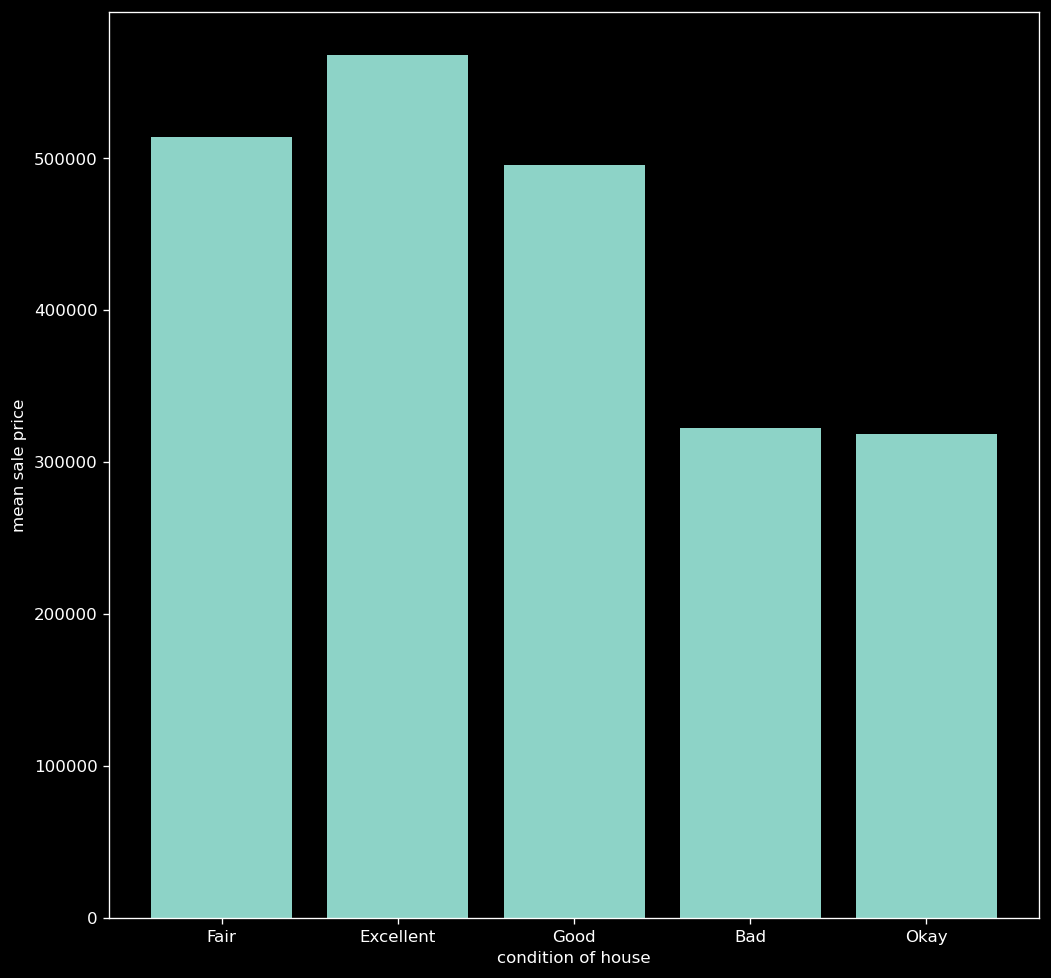

In [26]:
plt.figure(figsize = (10,10), dpi = 120)

plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel("condition of house")
plt.ylabel("mean sale price")

the mean sale price of bad and okay are very similar so it is actually useful to bin these two 

In [27]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

here we put fair and good into a single category called good and okay and bad into a single category called okay

In [44]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Price')

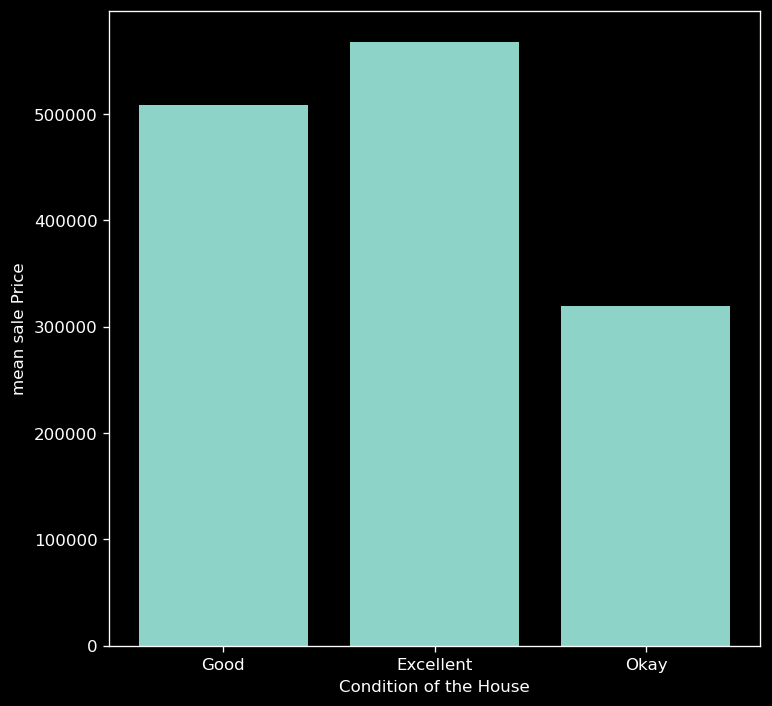

In [45]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Price")

now you can see we only have 3 categories which is easier to work with

## Continuous Binning:

In [34]:
data['Age of House (in Years)']

0        63
1        67
2        85
3        53
4        31
         ..
21604     9
21605     4
21606     9
21607    14
21608    10
Name: Age of House (in Years), Length: 21609, dtype: int64

In [31]:
data['Age of House (in Years)'].unique()

array([ 63,  67,  85,  53,  31,  17,  23,  55,  58,  15,  76,  91,  41,
       118,  39,  24, 102,  97,  49,  71,  50,  33,  77, 103, 109,  70,
        13,  89,  37,  88, 114,  22,  18,  34,   4,  96,  59,  52,  65,
        68,  10,  27,  64,  45,  93,  29,  46,  32,  62,  16,  26,  54,
        66,  57,  12,  56,  79,  72,  51,  43,  38, 108,  35,  40, 113,
        47,   8,  73,  94,  28, 104,  92,  14,  95,  11,  42,  69,  19,
       117,  30,  25,  98,  21,  75,  61,  78, 100,  90,  44, 107,  82,
        81,  36, 110,  87,  20, 105,   5, 111,  60,   6, 106,   7, 101,
        86,  74, 116,   9, 115,  48,   3,  84,  80,  99, 112,  83])

In [30]:
len(data['Age of House (in Years)'].unique())

116

thats a lot of numbers and it is difficult to work with. so we categorise them into different categories. 

here we are taking the age of house into account,

so we can categorise like if:
- age < 10 , its new
- age < 50 , its old
- age > 50 , very old

In [37]:
print(data['Age of House (in Years)'].max())
print(data['Age of House (in Years)'].min())

118
3


In [38]:
def age_of_house(x):
  if x < 10:
    x = 'new'
  elif x < 50:
    x = 'old'
  else:
    x = 'very old'
  return x

In [39]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

we have successfully categorised them into 3 categories

In [42]:
mean2 = []

for i in cat_house_age.unique():
  mean2.append(data['Sale Price'][cat_house_age == i].mean())

Text(0, 0.5, 'mean sale Prie')

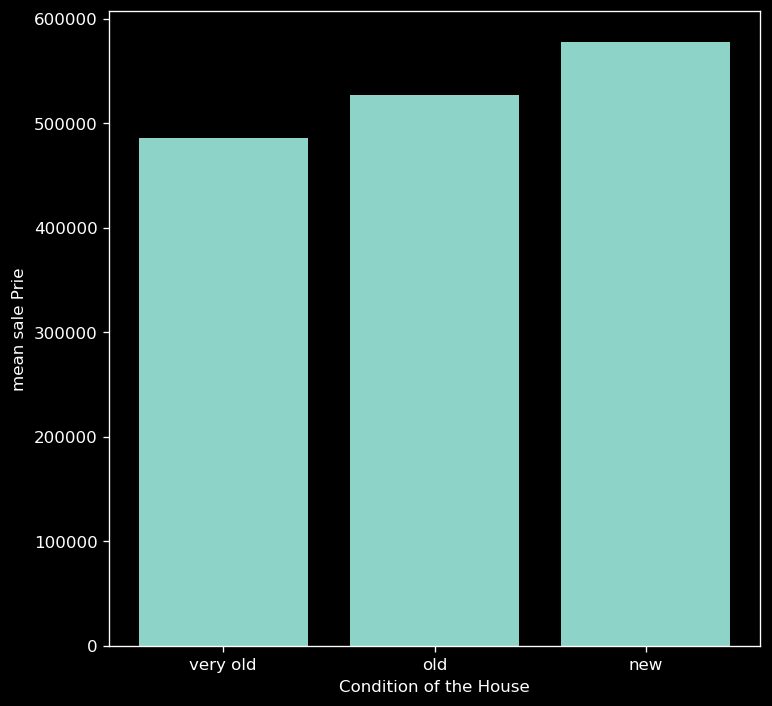

In [43]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar(cat_house_age.unique(), mean2)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

there is loss of info in continuous variable binning

# Feature Generation

## Feature extraction:
- we extract info from existing info so that the extracted info contains the info in simpler form

In [47]:
data['Date House was Sold']

0         14 October 2017
1        14 December 2017
2        15 February 2016
3        14 December 2017
4        15 February 2016
               ...       
21604         14 May 2017
21605    15 February 2016
21606        14 June 2017
21607     15 January 2016
21608     14 October 2017
Name: Date House was Sold, Length: 21609, dtype: object

In [50]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data["month_sold"] = time.month
data['weekday_sold'] = time.day_name()
data['date_sold'] = time.days_in_month

data[['year_sold','month_sold','weekday_sold','date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


In [51]:
month_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'month_sold',
                aggfunc = 'mean')

month_sale

month_sold,1,2,3,4,5,6,7,8,9,10,11,12
Sale Price,494549.626789,485457.269015,515501.697439,533078.767817,518714.583092,527367.035337,519160.693351,507810.789691,502577.903044,508442.986155,495134.871722,497170.721278


Text(0, 0.5, 'mean_sale')

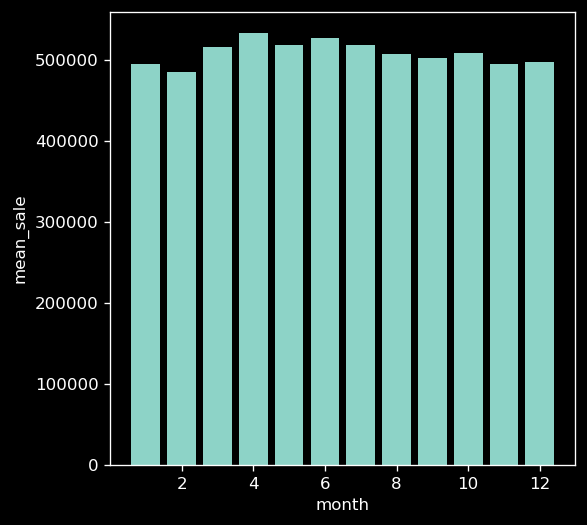

In [52]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(month_sale.columns, month_sale.iloc[0])
plt.xlabel("month")
plt.ylabel('mean_sale')

In [53]:
weekday_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'weekday_sold',
                aggfunc = 'mean')

weekday_sale

weekday_sold,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sale Price,520448.811624,499055.835999,508442.986155,518714.583092,500126.758398,506753.572298,527367.035337


Text(0, 0.5, 'mean_sale')

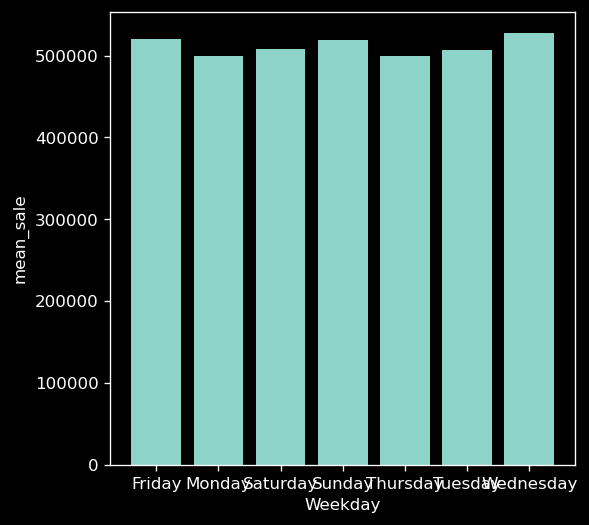

In [54]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [55]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold',
                aggfunc = 'mean')

date_sale

date_sold,29,30,31
Sale Price,485457.269015,517266.623436,510817.80564


Text(0, 0.5, 'mean_sale')

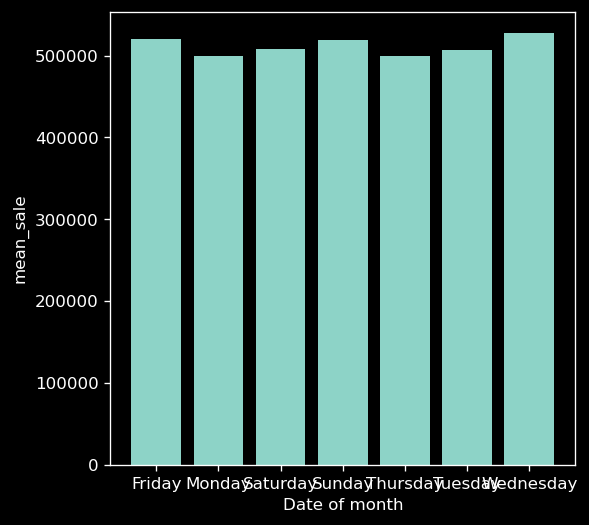

In [56]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Date of month")
plt.ylabel('mean_sale')

In [58]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Excellent','Good']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2 :
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
data['luxury_home'].value_counts()

No     11285
Yes    10324
Name: luxury_home, dtype: int64

In [60]:
luxury = data.pivot_table(values = "Sale Price", columns = 'luxury_home', aggfunc = 'mean' )
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, ' Mean Sale Price')

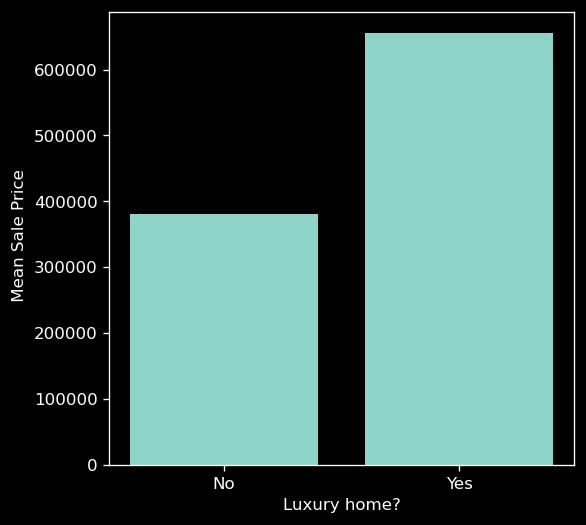

In [61]:
plt.figure(figsize = (5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel(" Mean Sale Price")

# idk what this is but im putting it here just in case

Text(0, 0.5, 'frequency ratio')

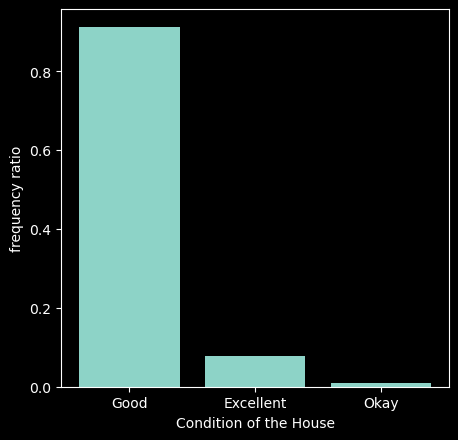

In [62]:
freq_condition = data['Condition of the House'].value_counts()
freq_condition = freq_condition/freq_condition.sum()

plt.figure( figsize = (5,5), dpi = 100)
plt.bar(freq_condition.index, freq_condition)
plt.xlabel('Condition of the House')
plt.ylabel('frequency ratio')

In [63]:
data['freq_cond'] = 0

for i in data['Condition of the House'].unique():
  data['freq_cond'][data['Condition of the House']==i] = freq_condition.loc[i]

data['freq_cond'].head()

0    0.911935
1    0.911935
2    0.911935
3    0.078717
4    0.911935
Name: freq_cond, dtype: float64